# Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data

In [2]:
data = pd.read_excel('College1_Data.xlsx',skiprows=1)
data.head()

,student_id,Video_Access,Practice_Problem_Access,Forum_Access,Marks_Assgnmt1,Video_Access.1,Practice_Problem_Access.1,Forum_Access.1,Marks_Assgnmt1.1,Video_Access.2,Practice_Problem_Access.2,Forum_Access.2,Marks_Assgnmt1.2
0,1.0,NaN,NaN,NaN,NaN,0.1815,0.4255,0.4925,0.8938,0.75,0.8468,0.35,0.7201
1,2.0,NaN,NaN,NaN,NaN,0.9350,0.4126,0.7105,0.8863,0.76,0.8171,1.00,0.8210
2,3.0,0.75,0.45,0.1012,0.8341,0.1929,0.4871,0.5087,0.9020,0.77,0.6487,0.63,0.5727
3,4.0,NaN,NaN,NaN,NaN,0.9679,0.4319,0.4809,0.9156,0.76,0.7470,0.60,0.8758
4,5.0,0.50,0.30,0.9796,0.6437,0.9019,0.3797,0.4182,0.8914,0.76,0.8981,0.42,0.7519


In [3]:
data.isnull().sum()

student_id                     1
Video_Access                 293
Practice_Problem_Access      293
Forum_Access                 293
Marks_Assgnmt1               293
Video_Access.1                 0
Practice_Problem_Access.1      0
Forum_Access.1                 0
Marks_Assgnmt1.1               0
Video_Access.2               360
Practice_Problem_Access.2    360
Forum_Access.2               360
Marks_Assgnmt1.2             360
dtype: int64

In [4]:
data.shape

(480, 13)

In [5]:
data[data['student_id'].isnull()].index

Int64Index([151], dtype='int64')

In [6]:
data['student_id'].iloc[151]=152

In [7]:
data.isnull().sum()

student_id                     0
Video_Access                 293
Practice_Problem_Access      293
Forum_Access                 293
Marks_Assgnmt1               293
Video_Access.1                 0
Practice_Problem_Access.1      0
Forum_Access.1                 0
Marks_Assgnmt1.1               0
Video_Access.2               360
Practice_Problem_Access.2    360
Forum_Access.2               360
Marks_Assgnmt1.2             360
dtype: int64

In [8]:
len(set(data['student_id']))==len(data['student_id']) # To check if student id is unique!! set takes only distinct values

True

In [9]:
data.set_index('student_id',inplace=True)

In [10]:
data.head()

,Video_Access,Practice_Problem_Access,Forum_Access,Marks_Assgnmt1,Video_Access.1,Practice_Problem_Access.1,Forum_Access.1,Marks_Assgnmt1.1,Video_Access.2,Practice_Problem_Access.2,Forum_Access.2,Marks_Assgnmt1.2
student_id,,,,,,,,,,,,
1.0,NaN,NaN,NaN,NaN,0.1815,0.4255,0.4925,0.8938,0.75,0.8468,0.35,0.7201
2.0,NaN,NaN,NaN,NaN,0.9350,0.4126,0.7105,0.8863,0.76,0.8171,1.00,0.8210
3.0,0.75,0.45,0.1012,0.8341,0.1929,0.4871,0.5087,0.9020,0.77,0.6487,0.63,0.5727
4.0,NaN,NaN,NaN,NaN,0.9679,0.4319,0.4809,0.9156,0.76,0.7470,0.60,0.8758
5.0,0.50,0.30,0.9796,0.6437,0.9019,0.3797,0.4182,0.8914,0.76,0.8981,0.42,0.7519


## Splitting data into 3 courses

In [11]:
course1 = data.loc[:,'Video_Access':'Marks_Assgnmt1']
course1.head()

,Video_Access,Practice_Problem_Access,Forum_Access,Marks_Assgnmt1
student_id,,,,
1.0,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN
3.0,0.75,0.45,0.1012,0.8341
4.0,NaN,NaN,NaN,NaN
5.0,0.50,0.30,0.9796,0.6437


In [12]:
course1.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 480 entries, 1.0 to 480.0
Data columns (total 4 columns):
Video_Access               187 non-null float64
Practice_Problem_Access    187 non-null float64
Forum_Access               187 non-null float64
Marks_Assgnmt1             187 non-null float64
dtypes: float64(4)
memory usage: 18.8 KB


In [13]:
course1.describe().T

,count,mean,std,min,25%,50%,75%,max
Video_Access,187.0,0.655027,0.080137,0.4400,0.60000,0.6500,0.7100,0.8900
Practice_Problem_Access,187.0,0.617005,0.272885,0.1100,0.41000,0.6500,0.8800,1.0000
Forum_Access,187.0,0.519139,0.417654,0.1002,0.10535,0.1202,0.9438,1.0000
Marks_Assgnmt1,187.0,0.630048,0.147797,0.2219,0.54095,0.6452,0.7193,0.9963


In [14]:
course1.isnull().sum()

Video_Access               293
Practice_Problem_Access    293
Forum_Access               293
Marks_Assgnmt1             293
dtype: int64

In [15]:
course2 = data.loc[:,'Video_Access.1':'Marks_Assgnmt1.1']
course2.head()

,Video_Access.1,Practice_Problem_Access.1,Forum_Access.1,Marks_Assgnmt1.1
student_id,,,,
1.0,0.1815,0.4255,0.4925,0.8938
2.0,0.9350,0.4126,0.7105,0.8863
3.0,0.1929,0.4871,0.5087,0.9020
4.0,0.9679,0.4319,0.4809,0.9156
5.0,0.9019,0.3797,0.4182,0.8914


In [16]:
print(course2.info())
print('---------------------')
print(course2.describe().T)
print('---------------------')
print(course2.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Float64Index: 480 entries, 1.0 to 480.0
Data columns (total 4 columns):
Video_Access.1               480 non-null float64
Practice_Problem_Access.1    480 non-null float64
Forum_Access.1               480 non-null float64
Marks_Assgnmt1.1             480 non-null float64
dtypes: float64(4)
memory usage: 18.8 KB
None
---------------------
                           count      mean       std     min       25%  \
Video_Access.1             480.0  0.758215  0.273621  0.1008  0.725025   
Practice_Problem_Access.1  480.0  0.450051  0.065000  0.2819  0.404675   
Forum_Access.1             480.0  0.500049  0.100002  0.1892  0.430700   
Marks_Assgnmt1.1           480.0  0.900050  0.007999  0.8755  0.894500   

                               50%       75%     max  
Video_Access.1             0.87745  0.941700  1.0000  
Practice_Problem_Access.1  0.44825  0.495725  0.6388  
Forum_Access.1             0.50365  0.570775  0.7972  
Marks_Assgnmt1.1           0.90

In [17]:
course3 = data.loc[:,'Video_Access.2':'Marks_Assgnmt1.2']
course3.head()

,Video_Access.2,Practice_Problem_Access.2,Forum_Access.2,Marks_Assgnmt1.2
student_id,,,,
1.0,0.75,0.8468,0.35,0.7201
2.0,0.76,0.8171,1.00,0.8210
3.0,0.77,0.6487,0.63,0.5727
4.0,0.76,0.7470,0.60,0.8758
5.0,0.76,0.8981,0.42,0.7519


In [18]:
print(course3.info())
print('---------------------')
print(course3.describe().T)
print('---------------------')
print(course3.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Float64Index: 480 entries, 1.0 to 480.0
Data columns (total 4 columns):
Video_Access.2               120 non-null float64
Practice_Problem_Access.2    120 non-null float64
Forum_Access.2               120 non-null float64
Marks_Assgnmt1.2             120 non-null float64
dtypes: float64(4)
memory usage: 18.8 KB
None
---------------------
                           count      mean       std     min       25%  \
Video_Access.2             120.0  0.765000  0.006482  0.7500  0.760000   
Practice_Problem_Access.2  120.0  0.800047  0.100801  0.5185  0.734750   
Forum_Access.2             120.0  0.581750  0.232966  0.1100  0.402500   
Marks_Assgnmt1.2           120.0  0.740047  0.087000  0.5106  0.680025   

                               50%       75%     max  
Video_Access.2             0.76500  0.770000  0.7800  
Practice_Problem_Access.2  0.80430  0.875700  0.9953  
Forum_Access.2             0.56000  0.780000  1.0000  
Marks_Assgnmt1.2           0.74

### To check if there all null values belong to same index(student id)!!

In [19]:
print(course1[course1['Video_Access'].isnull()].index==course1[course1['Practice_Problem_Access'].isnull()].index)
print(course1[course1['Video_Access'].isnull()].index==course1[course1['Forum_Access'].isnull()].index)
print(course1[course1['Video_Access'].isnull()].index==course1[course1['Marks_Assgnmt1'].isnull()].index)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [20]:
print(course3[course3['Video_Access.2'].isnull()].index==course3[course3['Practice_Problem_Access.2'].isnull()].index)
print(course3[course3['Video_Access.2'].isnull()].index==course3[course3['Forum_Access.2'].isnull()].index)
print(course3[course3['Video_Access.2'].isnull()].index==course3[course3['Marks_Assgnmt1.2'].isnull()].index)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

## Courses that have null values
### Course1 has 293 null values i.e 293 out of 480 students didn't take course1
### Course3 has 360 null values i.e 360 out of 480 students didn't take course3

In [21]:
#List of students who haven't taken the courses
#Course1
not_taken_1 = list(course1[course1['Video_Access'].isnull()].index)
#Course3
not_taken_3 = list(course3[course3['Video_Access.2'].isnull()].index)

print("Students who haven't taken course1 : ",not_taken_1)
print("----------------------------------")
print("Students who haven't taken course3 : ",not_taken_3)

Students who haven't taken course1 :  [1.0, 2.0, 4.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 15.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 26.0, 27.0, 30.0, 31.0, 33.0, 37.0, 38.0, 40.0, 41.0, 43.0, 45.0, 48.0, 50.0, 51.0, 52.0, 53.0, 54.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 68.0, 70.0, 71.0, 72.0, 74.0, 75.0, 77.0, 78.0, 79.0, 80.0, 81.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 104.0, 105.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 126.0, 127.0, 129.0, 130.0, 131.0, 132.0, 133.0, 135.0, 136.0, 137.0, 138.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 149.0, 150.0, 152.0, 154.0, 156.0, 158.0, 159.0, 160.0, 161.0, 162.0, 164.0, 167.0, 169.0, 172.0, 175.0, 176.0, 177.0, 178.0, 180.0, 182.0, 183.0, 185.0, 189.0, 191.0, 192.0, 193.0, 197.0, 200.0, 201.0, 204.0, 205.0, 207.0, 208.0, 209.0, 212.0, 213.0, 214.0, 216.0, 218.0, 219.0, 220.0

In [22]:
#Students who haven't taken both 1 and 3
not_taken_both = []
for x in not_taken_1:
    if x in not_taken_3:
        not_taken_both.append(x)

print("Students who didn't take course1 and course3 are : ", not_taken_both)
print("----------------------")
print("Number of students who didn't take both courses are : ", len(not_taken_both))

Students who didn't take course1 and course3 are :  [62.0, 63.0, 64.0, 65.0, 66.0, 68.0, 70.0, 71.0, 72.0, 74.0, 75.0, 77.0, 78.0, 79.0, 80.0, 81.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 104.0, 105.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 126.0, 127.0, 129.0, 130.0, 131.0, 132.0, 133.0, 135.0, 136.0, 137.0, 138.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 149.0, 150.0, 152.0, 154.0, 156.0, 158.0, 159.0, 160.0, 161.0, 162.0, 164.0, 167.0, 169.0, 172.0, 175.0, 176.0, 177.0, 178.0, 180.0, 182.0, 183.0, 185.0, 189.0, 191.0, 192.0, 193.0, 197.0, 200.0, 201.0, 204.0, 205.0, 207.0, 208.0, 209.0, 212.0, 213.0, 214.0, 216.0, 218.0, 219.0, 220.0, 221.0, 222.0, 223.0, 224.0, 225.0, 226.0, 228.0, 230.0, 231.0, 233.0, 234.0, 238.0, 239.0, 301.0, 304.0, 306.0, 307.0, 308.0, 309.0, 310.0, 311.0, 319.0, 320.0, 322.0, 323.0, 324.0, 329.0, 330.0, 331.0, 334.0, 337.0, 340.0, 

### Dealing with null values

In [23]:
course1.dropna(inplace=True)
course3.dropna(inplace=True)
print(course1.shape)
print(course3.shape)

(187, 4)
(120, 4)


C:\Users\Ravi Sreedhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ravi Sreedhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Metrics to evaluate courses
## Marks of the Assignment is considered as passing conditions!! 0.40 and above is passing

Text(0.5, 1.0, 'Course1')

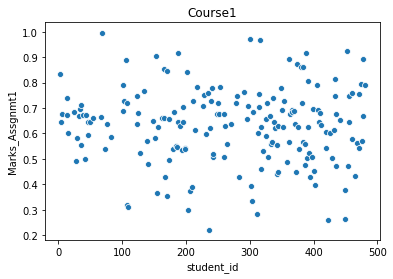

In [43]:
#Eda
sns.scatterplot(y='Marks_Assgnmt1',x=course1.index,data=course1).set_title("Course1") #Course1

Text(0.5, 1.0, 'Course2')

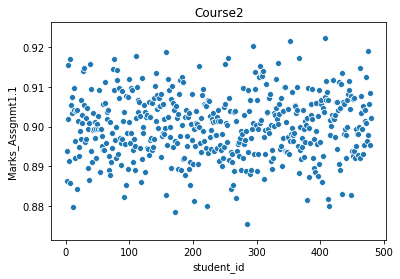

In [44]:
sns.scatterplot(y='Marks_Assgnmt1.1',x=course2.index,data=course2).set_title("Course2") #Course2

Text(0.5, 1.0, 'Course3')

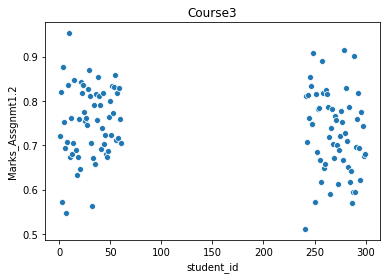

In [45]:
sns.scatterplot(y='Marks_Assgnmt1.2',x=course3.index,data=course3).set_title("Course3") #Course3
#natural cluster formed

In [47]:
course1.corr()

,Video_Access,Practice_Problem_Access,Forum_Access,Marks_Assgnmt1
Video_Access,1.000000,0.086618,-0.000287,-0.068181
Practice_Problem_Access,0.086618,1.000000,0.087322,-0.019752
Forum_Access,-0.000287,0.087322,1.000000,-0.071785
Marks_Assgnmt1,-0.068181,-0.019752,-0.071785,1.000000


In [48]:
course2.corr()

,Video_Access.1,Practice_Problem_Access.1,Forum_Access.1,Marks_Assgnmt1.1
Video_Access.1,1.000000,-0.039696,0.034821,-0.092737
Practice_Problem_Access.1,-0.039696,1.000000,0.025992,0.083503
Forum_Access.1,0.034821,0.025992,1.000000,-0.012768
Marks_Assgnmt1.1,-0.092737,0.083503,-0.012768,1.000000


In [49]:
course3.corr()

,Video_Access.2,Practice_Problem_Access.2,Forum_Access.2,Marks_Assgnmt1.2
Video_Access.2,1.000000,0.044332,-0.074846,0.081562
Practice_Problem_Access.2,0.044332,1.000000,-0.051198,-0.005499
Forum_Access.2,-0.074846,-0.051198,1.000000,0.054388
Marks_Assgnmt1.2,0.081562,-0.005499,0.054388,1.000000


In [51]:
def check_pass_fail(a)
if a>0.4:
    return 1

course1['Pass'] = course1['Marks_Assgnmt1'].apply(check_pass_fail)
course1

SyntaxError: invalid syntax (<ipython-input-51-6f1b2c8ad4b7>, line 1)

## Further steps to proceed
- create class for pass
- run logistic regression and check accuracy
- retrieve coefficients for logistic regression
- check pass percentage of predicted value